# **Data Augmentation**

Creating overlay images by superimposing signs onto some common backgrounds

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def add_transparent_image(background, foreground, x_offset=None, y_offset=None):
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape

    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'

    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2

    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)

    if w < 1 or h < 1: return

    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]

    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0

    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))

    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask

    # overwrite the section of the background image that has been updated
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import random
from google.colab.patches import cv2_imshow

'''
  creating more images using images with transparent backgrounds

  all such images are stored in overlays folder inside each directory

  backgrounds are seperately stored under complete_set/backgrounds folder
'''

bkg_path = "/content/drive/MyDrive/IEEE Conference 2022/complete_set/backgrounds"
main_path = "/content/drive/MyDrive/IEEE Conference 2022/complete_set/dataset"
items = os.listdir(main_path)

for each_directory in items: # each directory denoting a label
  storage_path = main_path + "/"
  curr_path = storage_path + each_directory + "/overlays"
  for each_overlay in os.listdir(curr_path): # each image in a particular directory
    if each_overlay.endswith((".jpg",".jpeg",".png",".JPG",".JPEG",".PNG")):
      image_full_path = curr_path + "/" + each_overlay # path of overlay images
      overlay = cv2.imread(image_full_path, cv2.IMREAD_UNCHANGED)
      # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      for each_background in os.listdir(bkg_path): # iterating over the background images
        if each_background.endswith((".jpg",".jpeg",".png")):
          singular_image_path = bkg_path + "/" + each_background # path of each background image
          # print(singular_image_path)
          bkg = cv2.imread(singular_image_path)
          x_offset = 0
          y_offset = 0
          img = bkg.copy()
          add_transparent_image(img, overlay, x_offset, y_offset)
          
          # cv2_imshow(overlay)
          new_place = storage_path + each_directory + "/" + str(int(random.random()*100))+".jpg"
          # print(each_overlay, "--->", new_place)
          cv2.imwrite(new_place, img)
          # cv2_imshow(img)


creating ImageDataGenerator to create more images containing:


1.   rotations
2.   width shifts
3.   height shifts
4.   shearing
5.   zooming
6.   brightness alterations


---



In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
   
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
    rotation_range= 20,
    # width_shift_range= 0.1,
    # height_shift_range= 0.1,
    rescale= 1.0/255,
    shear_range= 0.4,
    zoom_range= 0.2,
    horizontal_flip= False,
    fill_mode= 'nearest',
    brightness_range = (0.5, 1.8)
)

In [ ]:
import os
from google.colab.patches import cv2_imshow

main_path = "/content/drive/MyDrive/IEEE Conference 2022/complete_set/dataset"
item = os.listdir(main_path)

for each_directory in item: # each directory denoting a label
  curr_path = main_path + "/" + each_directory
  for each_pic in os.listdir(curr_path): # each image in a particular directory
    if each_pic.endswith((".jpg",".jpeg",".png",".JPG",".JPEG",".PNG")):
      img_full_path = curr_path + "/" + each_pic # path of images 
      img = load_img(img_full_path)
      img_array = img_to_array(img) # Converting the input sample image to an array
      img_array = img_array.reshape((1, ) + img_array.shape) # Reshaping the input image
      # store_at = main_path + "/" + each_directory
      # creating 5 augmented images per image
      store_at = curr_path
      count = 0
      for batch in datagen.flow(img_array, batch_size = 2, save_to_dir = store_at, save_prefix ='1', save_format ='jpeg'):
        count += 1
        if count == 5:
            break
  print(each_directory,"is done...")
print("Augmentation Complete!!")

turn left ahead is done...
men at work is done...
turn right ahead is done...
no cycling is done...
slippery road is done...
no right turn is done...
falling rocks is done...
no left turn is done...
wild animals is done...
Augmentation Complete!!


generating random noise in certain pictures

1.   salt and pepper noise
2.   gaussian blur



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.util import random_noise
from random import randint
import random
import os

main_path = "/content/drive/MyDrive/IEEE Conference 2022/complete_set/dataset"
item = os.listdir(main_path)

for each_directory in item: # each directory denoting a label
  curr_path = main_path + "/" + each_directory
  for each_pic in os.listdir(curr_path): # each image in a particular directory
    if each_pic.endswith((".jpg",".jpeg",".png",".JPG",".JPEG",".PNG")):
      image_path = curr_path + "/" + each_pic
      img = cv2.imread(image_path)
      img2 = img.copy()
      rand1 = randint(0, 100)
      if rand1 % 2 == 0: # 50% chance of adding a noise
        rand2 = randint(0, 10)
        if rand2 % 4 == 0: # 25% chance of adding a salt and pepper noise
          noise_img = random_noise(img, mode='s&p',amount=0.3)
          # The above function returns a floating-point image on the range [0, 1], thus we changed it to 'uint8' and from [0,255]
          noise_img = np.array(255*noise_img, dtype = 'uint8') 
        elif rand2 % 3 == 0: # 33% chance of adding a blur and 8% chance of both
          noise_img = cv2.GaussianBlur(img2,(5,5),cv2.BORDER_DEFAULT)
        new_place = curr_path + "/" + str(1000+int(random.random()*100))+".jpg"
        cv2.imwrite(new_place, noise_img)

In [ ]:
# Total in each label
import cv2
import os

main_path = "/content/drive/MyDrive/IEEE Conference 2022/complete_set/dataset"
item = os.listdir(main_path)

for each_directory in item: # each directory denoting a label
  curr_path = main_path + "/" + each_directory
  no_of_items = 0
  for each_pic in os.listdir(curr_path): # each image in a particular directory
    if each_pic.endswith((".jpg",".jpeg",".png",".JPG",".JPEG",".PNG")):
      no_of_items += 1
  print(each_directory, no_of_items)

turn left ahead 718
men at work 575
turn right ahead 673
slippery road 505
no right turn 591
falling rocks 566
no left turn 685
wild animals 720
no cycling 683


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CNN model creation**

In [1]:
# RMSprop  Adadelta  Adam SGD Adagrad
classes = 9
optimizer = 'Adam'

In [2]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
import random
from keras.utils import np_utils
import numpy as np
import pandas as pd

### **Model 0**:

In [3]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model0.summary())
model0.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 flatten (Flatten)           (None, 313632)            0         
                                                                 
 dense (Dense)               (None, 9)                 2822697   
                                                                 
Total params: 2,823,593
Trainable params: 2,823,593
Non-trainable params: 0
______________________________________________

### **Model 1**:
adam: [*0.9289 : 0.3086*]


In [4]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model1.summary())
model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 313632)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               40145024  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [5]:
# 
# model1.fit(train_x, train_Y, batch_size = 12, epochs = 20, validation_data = (test_x, test_Y))

# score1_0 = model1.evaluate(train_x, train_Y )   
# model_1_0_train=score1_0[1]

# score2_0 = model1.evaluate(test_x, test_Y )   
# model_1_0_test=score2_0[1]

In [6]:
# print("Training Accuracy:",model_1_0_train*100)
# print("Testing Accuracy:", model_1_0_test*100)   #causes overfitting

### **Model 2**:
adam: (*0.9471 : 0.4327*)

In [7]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu), # input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model2.summary())
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 dropout_3 (Dropout)         (None, 196, 196, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 194, 194, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 97, 97, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 301088)            0         
                                                      

In [8]:
# 
# model2.fit(train_x, train_Y, batch_size = 32, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score2_1 = model2.evaluate(train_x, train_Y )   
# model_2_0_train=score2_1[1]

# score2_2 = model2.evaluate(test_x, test_Y )   
# model_2_0_test=score2_2[1]

### **Model 3**:
adam: (*0.9466 : 0.4869*)

In [9]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu,input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model3.summary())
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 47, 47, 32)       

In [10]:
# 
# model3.fit(train_x, train_Y, batch_size = 32, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score3_1 = model3.evaluate(train_x, train_Y )   
# model_3_0_train=score3_1[1]

# score3_2 = model3.evaluate(test_x, test_Y )   
# model_3_0_test=score3_2[1]

### **Model 4** : 
adam: [*0.9440 : 0.3767*]

In [11]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model4.summary())
model4.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 192, 192, 32)      25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 96, 96, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 96, 96, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 92, 92, 64)        36928     
                                                      

In [12]:
# 
# model4.fit(train_x, train_Y, batch_size = 32, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score4_1 = model4.evaluate(train_x, train_Y )   
# model_4_0_train=score4_1[1]

# score4_2 = model4.evaluate(test_x, test_Y )   
# model_4_0_test=score4_2[1]

### **Model 5**:
adam: [*0.9462 : 0.5201*]

In [13]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model5.summary())
model5.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 conv2d_11 (Conv2D)          (None, 192, 192, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 96, 96, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 96, 96, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 94, 94, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 92, 92, 64)        36928     
                                                      

In [14]:
# 
# model5.fit(train_x, train_Y, batch_size = 32, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score5_1 = model5.evaluate(train_x, train_Y )   
# model_5_0_train=score5_1[1]

# score5_2 = model5.evaluate(test_x, test_Y )   
# model_5_0_test=score5_2[1]

### **Model 6**:
adam: [*0.9447 : 0.4108*]

In [15]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model6.summary())
model6.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 conv2d_15 (Conv2D)          (None, 192, 192, 32)      25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 96, 96, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 96, 96, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 94, 94, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 92, 92, 64)        36928     
                                                      

In [16]:
# 
# model6.fit(train_x, train_Y, batch_size = 32, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score6_1 = model6.evaluate(train_x, train_Y )   
# model_6_0_train=score6_1[1]

# score6_2 = model6.evaluate(test_x, test_Y )   
# model_6_0_test=score6_2[1]

### **Model 7**:
adam: [*0.9469 : 0.5149*]

In [17]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])
print(model7.summary())
model7.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 conv2d_19 (Conv2D)          (None, 192, 192, 64)      51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 96, 96, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 96, 96, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 94, 94, 128)       73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 92, 92, 256)       295168    
                                                      

In [18]:
# 
# model7.fit(train_x, train_Y, batch_size = 15, epochs = 20, validation_data = (test_x, test_Y), shuffle = True)

# score7_1 = model7.evaluate(train_x, train_Y )   
# model_7_0_train=score7_1[1]

# score7_2 = model7.evaluate(test_x, test_Y )   
# model_7_0_test=score7_2[1]

## Trying out various filter sizes

In [19]:
# filters = [3, 5, 9, 13, 15, 19, 23, 25, 31]
# model = [0] * len(filters)
# model_vals = []

# for i in range(len(model)):
#     model[i] = tf.keras.Sequential([
#         tf.keras.layers.Conv2D(32, kernel_size=filters[i], activation=tf.nn.relu, input_shape=(200, 200, 3)),
#         tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
#         tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(256, activation=tf.nn.relu),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(9, activation=tf.nn.softmax)
#     ])
#     model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# h = []

# for i in range(len(h)):
#     h.append(model[i].fit(train_x,train_y, batch_size=5, epochs = 20, validation_data = (test_x, test_Y), shuffle = True))

**Comprehension**

In [21]:
# data = {'On training dataset':[model_1_train*100, model_2_train*100, model_3_train*100],
#         'On testing dataset':[model_1_test*100, model_2_test*100, model_3_test*100]}

# df = pd.DataFrame(data, index=['2-layer CNN', '3-layer CNN', '4-layer CNN'])

# print("Accuracies--->")
# df

# **Training and testing data creation**

In [22]:
main_path = "/content/drive/MyDrive/IEEE Conference 2022/half_set/dataset/"
names=['falling rocks','men at work','no cycling','no left turn','no right turn','slippery road','turn left ahead','turn right ahead','wild animals']
data_images=[]
classes = len(names)
for labels in range(0,classes):
    count=0
    folder_path= main_path + names[labels] + "/"
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg",".jpeg",".png",".JPG",".JPEG",".PNG")):
            count += 1
            img = cv2.imread(os.path.join(folder_path,filename))
            if img is not None:
                img=cv2.resize(img, (200,200))
                data_images.append([img,labels])

In [23]:
data_images_copy = data_images

import random
random.shuffle(data_images_copy)

#**Train - Test random partition in 8:2, 7:3, 6:4**

In [24]:
train_images = []
test_images = []

split_percentage = int(len(data_images)*0.7) ##############################################
train_images = data_images_copy[:split_percentage]
test_images = data_images_copy[split_percentage:]

In [25]:
len(data_images),len(train_images),len(test_images)

(810, 567, 243)

### **View Data**

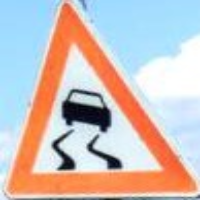

In [26]:
cv2_imshow(train_images[0][0])

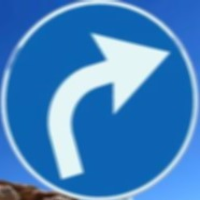

In [27]:
cv2_imshow(test_images[0][0])

###**Normalization**

In [28]:
train_x=[]
train_y=[]
test_x=[]
test_y=[]

for val in train_images:
  train_x.append(val[0])
  train_y.append(val[1])

for val in test_images:
  test_x.append(val[0])
  test_y.append(val[1])

train_x = np.array(train_x).reshape(-1, 200, 200, 3)
train_y = np.array(train_y) 

test_x = np.array(test_x).reshape(-1, 200, 200, 3)
test_y = np.array(test_y) 

In [29]:
train_x = train_x.astype('float32') / 255.0
train_Y = np_utils.to_categorical(train_y, classes)

test_x = test_x.astype('float32') / 255.0
test_Y = np_utils.to_categorical(test_y, classes)

# **Model Training**

In [30]:
def get_score(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y, epochs=150)
    return model.evaluate(test_x, test_y)[1]

In [31]:
mscore = get_score(model2, train_x, train_Y, test_x, test_Y)
print(mscore*100)

Epoch 1/150
18/18 [==============================] - 14s 113ms/step - loss: 9.0469 - accuracy: 0.2310
Epoch 2/150
18/18 [==============================] - 1s 76ms/step - loss: 1.5861 - accuracy: 0.3333
Epoch 3/150
18/18 [==============================] - 1s 76ms/step - loss: 1.3407 - accuracy: 0.4727
Epoch 4/150
18/18 [==============================] - 1s 76ms/step - loss: 1.3125 - accuracy: 0.4727
Epoch 5/150
18/18 [==============================] - 1s 76ms/step - loss: 1.2321 - accuracy: 0.5062
Epoch 6/150
18/18 [==============================] - 1s 75ms/step - loss: 1.1037 - accuracy: 0.5538
Epoch 7/150
18/18 [==============================] - 1s 76ms/step - loss: 0.8881 - accuracy: 0.6455
Epoch 8/150
18/18 [==============================] - 1s 76ms/step - loss: 0.8119 - accuracy: 0.6772
Epoch 9/150
18/18 [==============================] - 1s 76ms/step - loss: 0.6522 - accuracy: 0.7496
Epoch 10/150
18/18 [==============================] - 1s 77ms/step - loss: 0.5412 - accuracy: 0.78

In [ ]:
model_scores = []
for num in range(7):
    avg_score = 0
    # if num == 1:
    #     model = model1
    # elif num == 2:
    #     model = model2
    # elif num == 3:
    #     model = model3
    # elif num == 4:
    #     model = model4
    # elif num == 5:
    #     model = model5
    # elif num == 6:
    #     model = model6
    # else:
    #     model = model7
    for i in range(4):
        
        score = get_score(model7, train_x, train_Y, test_x, test_Y)
        avg_score = avg_score + score
    avg_score = avg_score/5
    model_scores.append(avg_score)





Epoch 1/20
3/3 [==============================] - 1s 155ms/step - loss: 0.3489 - accuracy: 0.8889
Epoch 2/20
3/3 [==============================] - 1s 155ms/step - loss: 0.3226 - accuracy: 0.8889
Epoch 3/20
3/3 [==============================] - 1s 156ms/step - loss: 0.3939 - accuracy: 0.8889
Epoch 4/20
3/3 [==============================] - 1s 154ms/step - loss: 0.3026 - accuracy: 0.8889
Epoch 5/20
3/3 [==============================] - 1s 156ms/step - loss: 0.2954 - accuracy: 0.9167
Epoch 6/20
3/3 [==============================] - 1s 157ms/step - loss: 0.2894 - accuracy: 0.9028
Epoch 7/20
3/3 [==============================] - 1s 155ms/step - loss: 0.2695 - accuracy: 0.9167
Epoch 8/20
3/3 [==============================] - 1s 155ms/step - loss: 0.2622 - accuracy: 0.9028
Epoch 9/20
3/3 [==============================] - 1s 157ms/step - loss: 0.2667 - accuracy: 0.9028
Epoch 10/20
3/3 [==============================] - 1s 155ms/step - loss: 0.2578 - accuracy: 0.9167
Epoch 11/20
3/3 [==

In [ ]:
for i in range(7):
    print("model",(i+1),"=",model_scores[i])

model 1 = 0.08888889029622078
model 2 = 0.211111119389534
model 3 = 0.17777778208255768
model 4 = 0.155555559694767
model 5 = 0.12222222536802292
model 6 = 0.11111111342906951
model 7 = 0.13333333730697633


#**K fold cross validation**

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
import random
random.shuffle(data_images_copy)
data_images_copy[0]

[array([[[160, 103,  58],
         [160, 103,  58],
         [160, 103,  58],
         ...,
         [168, 109,  63],
         [168, 109,  63],
         [168, 109,  63]],
 
        [[160, 103,  58],
         [160, 103,  58],
         [160, 103,  58],
         ...,
         [168, 109,  63],
         [168, 109,  63],
         [168, 109,  63]],
 
        [[160, 103,  58],
         [160, 103,  58],
         [160, 103,  58],
         ...,
         [168, 109,  63],
         [168, 109,  63],
         [168, 109,  63]],
 
        ...,
 
        [[185, 127,  75],
         [185, 127,  75],
         [185, 127,  75],
         ...,
         [207, 150,  94],
         [207, 150,  94],
         [206, 149,  93]],
 
        [[185, 127,  75],
         [185, 127,  75],
         [185, 127,  75],
         ...,
         [207, 150,  94],
         [207, 150,  94],
         [206, 149,  93]],
 
        [[185, 127,  75],
         [185, 127,  75],
         [185, 127,  75],
         ...,
         [207, 150,  94],
  

In [ ]:
for train_index, test_index in kf.split(data_images_copy):
    kf_train_x=[]
    kf_train_y=[]
    kf_test_x=[]
    kf_test_y=[]
    train_count=0
    test_count=0


    for val in train_index:
        train_count+=1
        kf_train_x.append(data_images_copy[val][0])
        kf_train_y.append(data_images_copy[val][1])

    for val in test_index:
        test_count+=1
        kf_test_x.append(data_images_copy[val][0])
        kf_test_y.append(data_images_copy[val][1])

    kf_train_x = np.array(kf_train_x).reshape(-1, 200, 200, 3)
    kf_train_y = np.array(kf_train_y) 

    kf_test_x = np.array(kf_test_x).reshape(-1, 200, 200, 3)
    kf_test_y = np.array(kf_test_y) 
    print(train_count, test_count)

    #normalisation
    kf_train_x = kf_train_x.astype('float32') / 255.0
    kf_train_Y = np_utils.to_categorical(kf_train_y, classes)

    kf_test_x = kf_test_x.astype('float32') / 255.0
    kf_test_Y = np_utils.to_categorical(kf_test_y, classes)
 
    #training
    score = get_score(model_copy, kf_train_x, kf_train_Y, kf_test_x, kf_test_Y)
    print(score*100)

72 18
Epoch 1/20
3/3 [==============================] - 1s 160ms/step - loss: 8.4410 - accuracy: 0.2639
Epoch 2/20
3/3 [==============================] - 1s 157ms/step - loss: 2.2998 - accuracy: 0.1250
Epoch 3/20
3/3 [==============================] - 1s 159ms/step - loss: 2.9289 - accuracy: 0.1528
Epoch 4/20
3/3 [==============================] - 1s 159ms/step - loss: 2.0709 - accuracy: 0.1667
Epoch 5/20
3/3 [==============================] - 1s 158ms/step - loss: 1.9210 - accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 1s 159ms/step - loss: 1.5772 - accuracy: 0.4722
Epoch 7/20
3/3 [==============================] - 1s 159ms/step - loss: 3.3924 - accuracy: 0.3056
Epoch 8/20
3/3 [==============================] - 1s 160ms/step - loss: 1.4575 - accuracy: 0.5833
Epoch 9/20
3/3 [==============================] - 1s 160ms/step - loss: 1.1700 - accuracy: 0.7361
Epoch 10/20
3/3 [==============================] - 1s 159ms/step - loss: 9.8643 - accuracy: 0.4028
Epoch 11/20
3